In [13]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 

from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm

purple = "#72306e"
darkpurple = "#362949"
gold = "#d6ad60"

In [3]:
## Import & Prepae Panel data structure

df =  pd.read_csv(r"C:\Users\misko\OneDrive\Desktop\BDS\Block 3\Research Hackathon I\EconomicTracker_Covid\EconomicTracker\Panel_structure_preprocessing\covid_spending_cases_mobility_panel.csv")
dfStates = pd.read_csv(r"C:\Users\misko\OneDrive\Desktop\BDS\Block 3\Research Hackathon I\EconomicTracker_Covid\EconomicTracker\us-state-ansi-fips.csv")

controlStates = sorted(["North Dakota", "South Dakota", "Wyoming", "Nebraska", "Iowa", "Utah", "Arkansas"])
treatmentStates = sorted(["Montana", "Idaho", "Missouri", "Kansas", "Louisiana", "Texas"])

controlFips = sorted(list(dfStates.loc[dfStates["stname"].isin(controlStates), " st"]))
treatmentFips = sorted(list(dfStates.loc[dfStates["stname"].isin(treatmentStates), " st"]))

stateFips = controlFips + treatmentFips
stateNames = controlStates + treatmentStates

dfControls = df[df["statefips"].isin(controlFips)]                    # controls df
dfTreatment = df[df["statefips"].isin(treatmentFips)]                 # treatment df

df = df.loc[df["statefips"].isin(stateFips)]                          # only consider the chosen states
cutoffWeek = 20
df = df.drop(df[(df.week > cutoffWeek) | (df.year == 2021)].index)    # drop later periods
colsToDrop = ['Unnamed: 0', 'year', 'month', 'day', 'date', 
              'new_vaccine_rate', 'vaccine_rate', 
              'fullvaccine_rate', 'booster_first_rate']
df = df.drop(columns = colsToDrop)                                    # drop irellevant columns
df = df.set_index(["week", "statefips"])                              # set index per week per state



dfBare = df[["spend_all", "stayathome_advisory",                      # create bare df with only relevant variables
             "new_case_rate", "gps_away_from_home"]]
df.to_csv("df_extended_did.csv")
dfBare.to_csv("df_did.csv")

In [6]:
df.loc[(range(8, cutoffWeek + 1), int(dfStates.loc[dfStates.stname == "Louisiana",][" st"])), 'stayathome_advisory']

week  statefips
8     22           0
9     22           0
10    22           0
11    22           0
12    22           1
13    22           1
14    22           1
15    22           1
16    22           1
17    22           1
18    22           1
19    22           1
20    22           0
Name: stayathome_advisory, dtype: int64

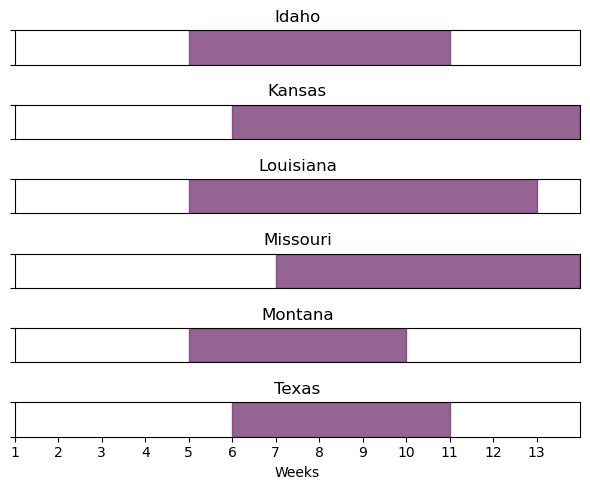

In [7]:
#Subplots per state for new covid cases with shaded region being the official stay-at-home order

fig, ax = plt.subplots(nrows = 6, ncols = 1, figsize=(6,5))

for j in range(6):
    state = treatmentFips[j]

    treatmentPeriod = []
    for k in range(1, len(range(8,cutoffWeek+1))):
        stayathomeDummy = list(df.loc[(range(8, cutoffWeek+1), state), "stayathome_advisory"])
        if stayathomeDummy[k-1] != stayathomeDummy[k]:
            treatmentPeriod.append(k)
    if len(treatmentPeriod) == 1:
        treatmentPeriod.append(13)
        
    ax[j].set_xlim(0,13)
    ax[j].set_yticklabels([])
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].title.set_text(treatmentStates[j])
    ax[j].axvspan(treatmentPeriod[0], treatmentPeriod[-1], color = purple, alpha = 0.75)
    
    if j == 5:
        ax[j].set_xticks(range(0,13))
        ax[j].set_xticklabels(range(1,14))
        ax[j].set_xlabel("Weeks")

fig.tight_layout()
# plt.savefig("Treatment_periods.png")
plt.show()

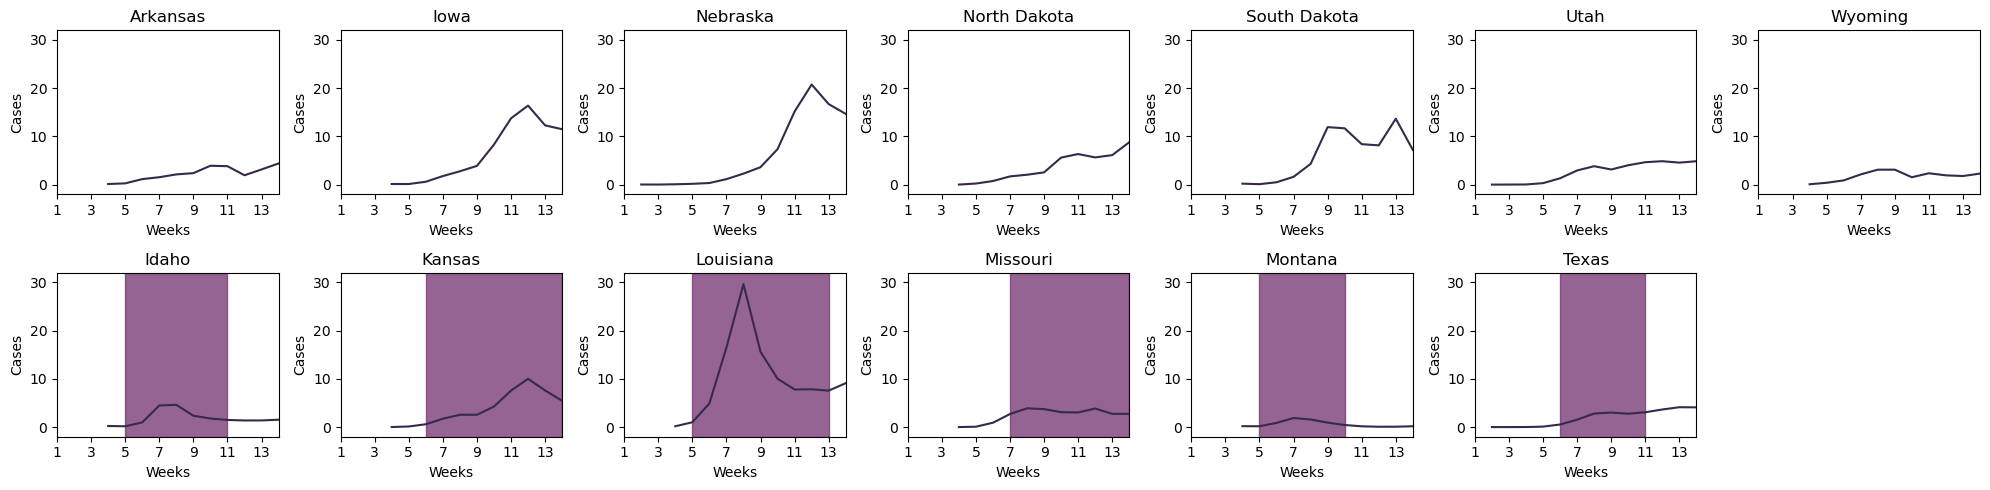

In [8]:
#Subplots per state for away from home mobility with shaded region being the official stay-at-home order

fig, ax = plt.subplots(nrows = 2, ncols = 7, figsize=(20,5))

s = 0
for i in range(2):
    for j in range(7):
        if s < 13:
            state = stateFips[s]
        
            treatmentPeriod = []
            for k in range(1, len(range(8,cutoffWeek+1))):
                stayathomeDummy = list(df.loc[(range(8, cutoffWeek+1), state), "stayathome_advisory"])
                if stayathomeDummy[k-1] != stayathomeDummy[k]:
                    treatmentPeriod.append(k)
            if len(treatmentPeriod) == 1:
                treatmentPeriod.append(13)

            ax[i][j].plot(range(1,14), df.loc[(range(8, cutoffWeek+1), state), "new_case_rate"], c = darkpurple)
            ax[i][j].set_ylim(-2, 32)
            ax[i][j].set_xlim(0,13)
            ax[i][j].set_xticks(range(0,13,2))
            ax[i][j].set_xticklabels(range(1,14,2))
            ax[i][j].title.set_text(stateNames[s])
            ax[i][j].set_ylabel("Cases")
            ax[i][j].set_xlabel("Weeks")
            
            if len(treatmentPeriod) != 0:
                ax[i][j].axvspan(treatmentPeriod[0], treatmentPeriod[-1], color = purple, alpha = 0.75)
            s += 1
        else:
            ax[i][j].set_visible(False)

fig.tight_layout()
# plt.savefig("State_covid_cases.png")
plt.show()

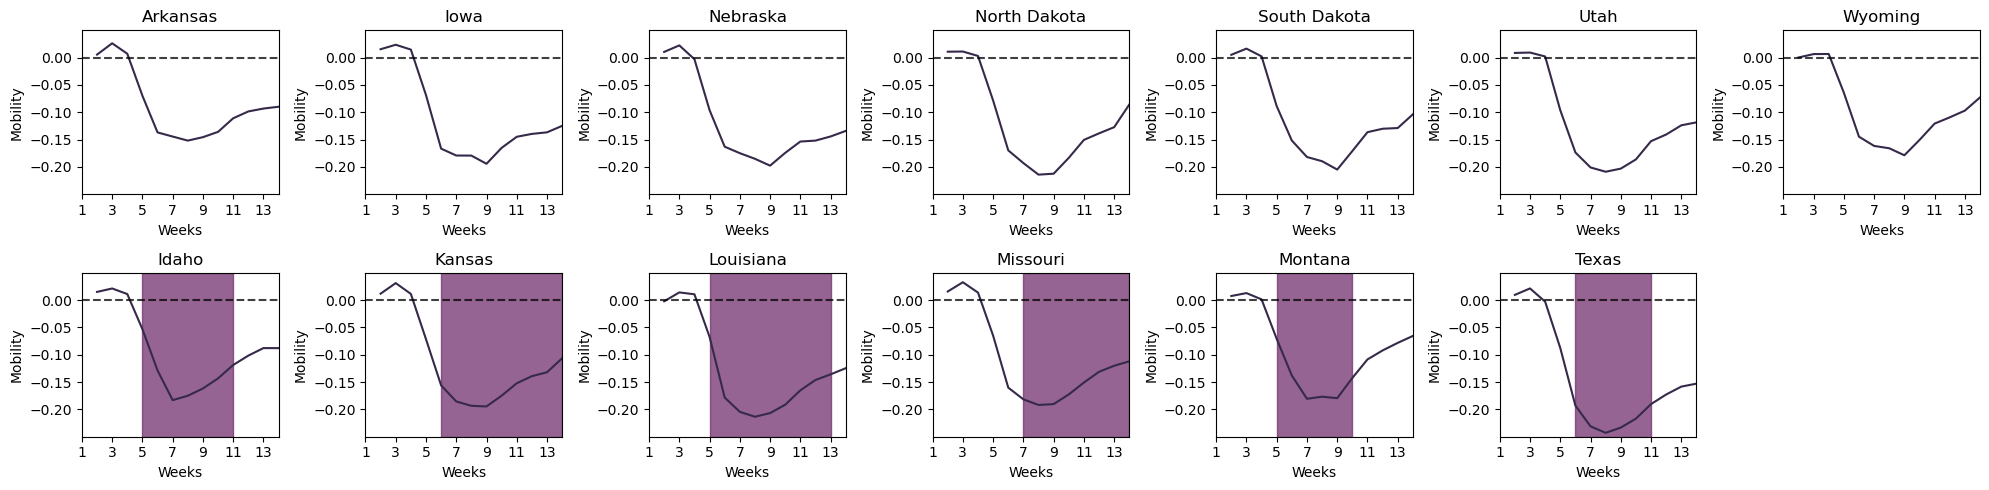

In [9]:
#Subplots per state for away from home mobility with shaded region being the official stay-at-home order

fig, ax = plt.subplots(nrows = 2, ncols = 7, figsize=(20,5))

s = 0
for i in range(2):
    for j in range(7):
        if s < 13:
            state = stateFips[s]
        
            treatmentPeriod = []
            for k in range(1, len(range(8,cutoffWeek+1))):
                stayathomeDummy = list(df.loc[(range(8, cutoffWeek+1), state), "stayathome_advisory"])
                if stayathomeDummy[k-1] != stayathomeDummy[k]:
                    treatmentPeriod.append(k)
            if len(treatmentPeriod) == 1:
                treatmentPeriod.append(13)

            ax[i][j].plot(range(1,14), df.loc[(range(8, cutoffWeek+1), state), "gps_away_from_home"], c = darkpurple)
            ax[i][j].axhline(0, linestyle = "--", c = "black", alpha = 0.75)
            ax[i][j].set_ylim(-0.25, 0.05)
            ax[i][j].set_yticks([0.00, -0.05, -0.10, -0.15, -0.20])
            ax[i][j].set_xlim(0,13)
            ax[i][j].set_xticks(range(0,13,2))
            ax[i][j].set_xticklabels(range(1,14,2))
            ax[i][j].title.set_text(stateNames[s])
            ax[i][j].set_ylabel("Mobility")
            ax[i][j].set_xlabel("Weeks")
            
            if len(treatmentPeriod) != 0:
                ax[i][j].axvspan(treatmentPeriod[0], treatmentPeriod[-1], color = purple, alpha = 0.75)
            s += 1
        else:
            ax[i][j].set_visible(False)

fig.tight_layout()
# plt.savefig("State_mobility.png")
plt.show()

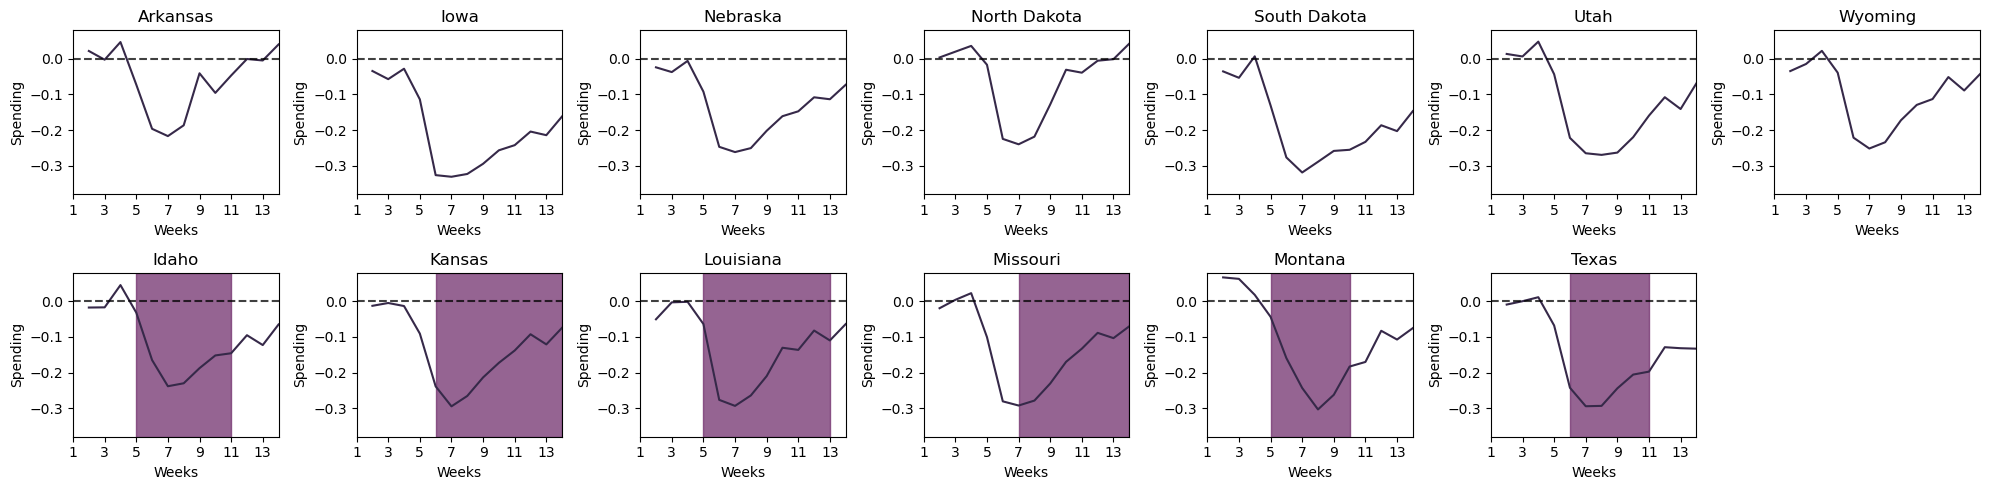

In [10]:
#Subplots per state for away from home mobility with shaded region being the official stay-at-home order

fig, ax = plt.subplots(nrows = 2, ncols = 7, figsize=(20,5))

s = 0
for i in range(2):
    for j in range(7):
        if s < 13:
            state = stateFips[s]
        
            treatmentPeriod = []
            for k in range(1, len(range(8,cutoffWeek+1))):
                stayathomeDummy = list(df.loc[(range(8, cutoffWeek+1), state), "stayathome_advisory"])
                if stayathomeDummy[k-1] != stayathomeDummy[k]:
                    treatmentPeriod.append(k)
            if len(treatmentPeriod) == 1:
                treatmentPeriod.append(13)

            ax[i][j].plot(range(1,14), df.loc[(range(8, cutoffWeek+1), state), "spend_all"], c = darkpurple)
            ax[i][j].axhline(0, linestyle = "--", c = "black", alpha = 0.75)
            ax[i][j].set_ylim(-0.38, 0.08)
#             ax[i][j].set_yticks([0.00, -0.05, -0.10, -0.15, -0.20])
            ax[i][j].set_xlim(0,13)
            ax[i][j].set_xticks(range(0,13,2))
            ax[i][j].set_xticklabels(range(1,14,2))
            ax[i][j].title.set_text(stateNames[s])
            ax[i][j].set_ylabel("Spending")
            ax[i][j].set_xlabel("Weeks")
            
            if len(treatmentPeriod) != 0:
                ax[i][j].axvspan(treatmentPeriod[0], treatmentPeriod[-1], color = purple, alpha = 0.75)
            s += 1
        else:
            ax[i][j].set_visible(False)

fig.tight_layout()
# plt.savefig("State_spending.png")
plt.show()

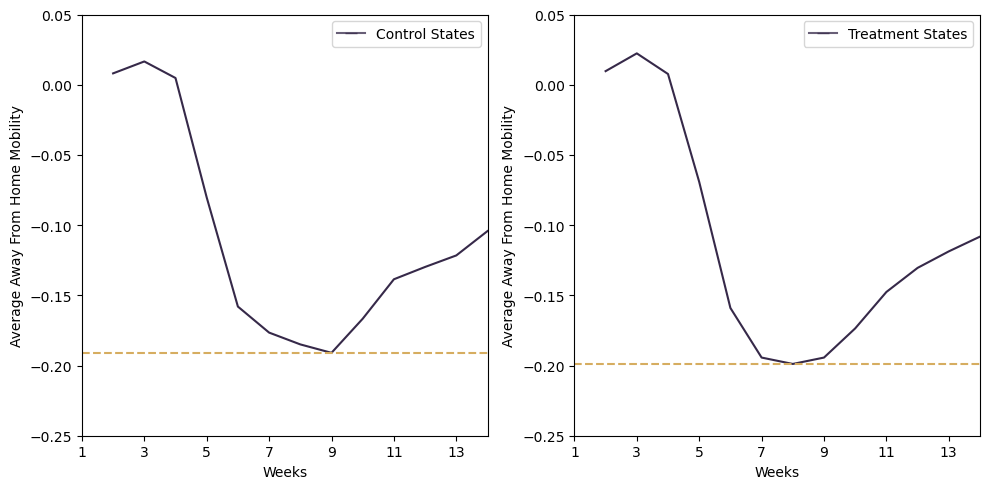

In [111]:
average_mobility_control = df.loc[(range(8,21),list(controlFips)),["gps_away_from_home"]].groupby("week").mean()
average_mobility_treatment = df.loc[(range(8,21),list(treatmentFips)),["gps_away_from_home"]].groupby("week").mean()
averages = [average_mobility_control, average_mobility_treatment]

legend_elements = [[Line2D([0], [0], marker = '_', color = darkpurple, 
                          label = "Control States", alpha = 0.75,
                          markersize = 8)],
                  [Line2D([0], [0], marker = '_', color = darkpurple, 
                          label = "Treatment States", alpha = 0.75,
                          markersize = 8)]]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

for i in range(2):
    ax[i].plot(range(1,14), averages[i], c = darkpurple)
    ax[i].set_ylim(-0.25, 0.05)
    ax[i].set_xlim(0,13)
    ax[i].set_xticks(range(0,13,2))
    ax[i].set_xticklabels(range(1,14,2))
    ax[i].axhline(float(averages[i].min()), linestyle = "--", c = gold)
    ax[i].set_xlabel("Weeks")
    ax[i].set_ylabel("Average Away From Home Mobility")
    ax[i].legend(handles = legend_elements[i])

plt.tight_layout()
plt.show()

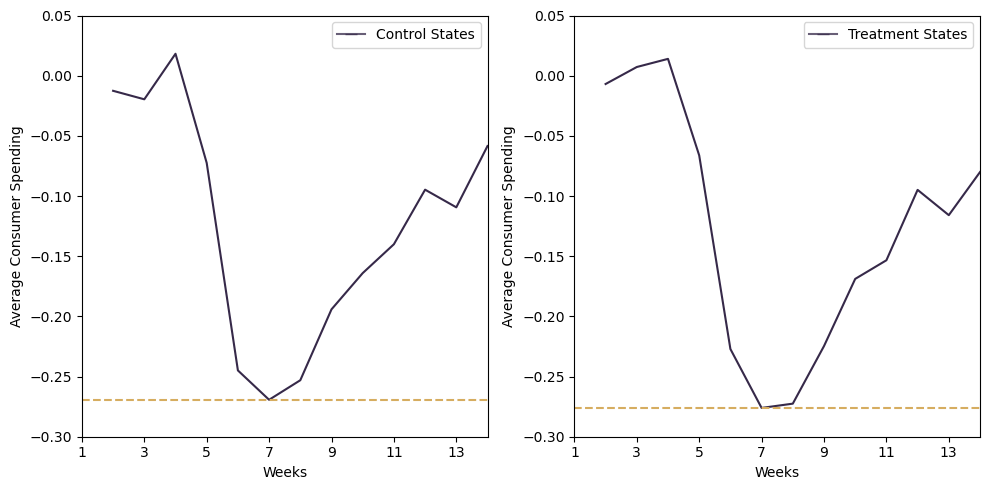

In [115]:
average_mobility_control = df.loc[(range(8,21),list(controlFips)),["spend_all"]].groupby("week").mean()
average_mobility_treatment = df.loc[(range(8,21),list(treatmentFips)),["spend_all"]].groupby("week").mean()
averages = [average_mobility_control, average_mobility_treatment]

legend_elements = [[Line2D([0], [0], marker = '_', color = darkpurple, 
                          label = "Control States", alpha = 0.75,
                          markersize = 8)],
                  [Line2D([0], [0], marker = '_', color = darkpurple, 
                          label = "Treatment States", alpha = 0.75,
                          markersize = 8)]]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

for i in range(2):
    ax[i].plot(range(1,14), averages[i], c = darkpurple)
    ax[i].set_ylim(-0.3, 0.05)
    ax[i].set_xlim(0,13)
    ax[i].set_xticks(range(0,13,2))
    ax[i].set_xticklabels(range(1,14,2))
    ax[i].axhline(float(averages[i].min()), linestyle = "--", c = gold)
    ax[i].set_xlabel("Weeks")
    ax[i].set_ylabel("Average Consumer Spending")
    ax[i].legend(handles = legend_elements[i])

plt.tight_layout()
plt.show()

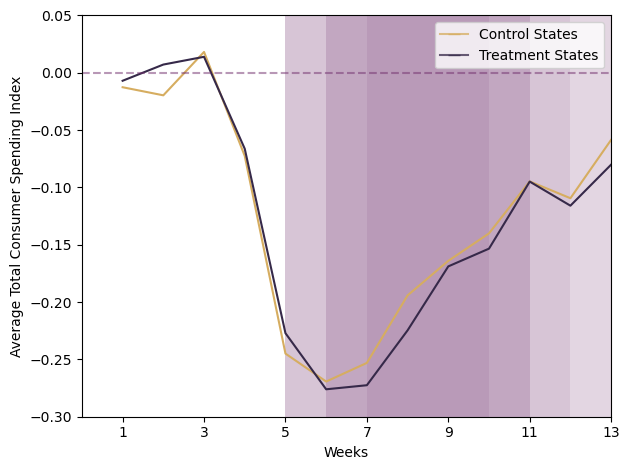

In [53]:
average_mobility_control = df.loc[(range(8,21),list(controlFips)),["spend_all"]].groupby("week").mean()
average_mobility_treatment = df.loc[(range(8,21),list(treatmentFips)),["spend_all"]].groupby("week").mean()
averages = [average_mobility_control, average_mobility_treatment]
treatment_periods = [(5,11), (6,13), (5,12), (7,13), (5,10), (6,11)]

legend_elements = [Line2D([0], [0], marker = '_', color = gold, 
                          label = "Control States", alpha = 0.75,
                          markersize = 8),
                  Line2D([0], [0], marker = '_', color = darkpurple, 
                          label = "Treatment States", alpha = 0.75,
                          markersize = 8)]

fig, ax = plt.subplots()
ax.plot(range(1,14), averages[0], c = gold)
ax.plot(range(1,14), averages[1], c = darkpurple)
ax.set_ylim(-0.3, 0.05)
ax.set_xlim(0,13)
ax.set_xticks(range(1,14,2))
ax.set_xticklabels(range(1,14,2))
ax.axhline(0, linestyle = "--", c = purple, alpha = 0.5)
for i in range(6):
    ax.axvspan(treatment_periods[i][0], treatment_periods[i][1], color = purple, alpha = 0.10, lw = 0)
ax.set_xlabel("Weeks")
ax.set_ylabel("Average Total Consumer Spending Index")
ax.legend(handles = legend_elements, loc = "upper right")
# ax.set_frame_on(False)

plt.tight_layout()
# plt.savefig("parallel_trends.png")
plt.show()

In [6]:
# Effect of stay-at-home order on cases

# Define variables
xCols = ['stayathome_advisory', 'new_case_rate']
X = sm.add_constant(df[xCols])
yVar = ['gps_away_from_home']

# Model
mod = PanelOLS(df[yVar], X, entity_effects = True)
# mod = PanelOLS.from_formula("gps_away_from_home ~ stayathome_advisory + new_case_rate + I(stayathome_advisory*new_case_rate)", data = df, other_effects = np.array(entity_effects))
re_res = mod.fit(cov_type = 'clustered', cluster_entity = True)
print(re_res)

C:\Users\misko\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\misko\anaconda3\lib\site-packages\linearmodels\shared\exceptions.py:37: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


                          PanelOLS Estimation Summary                           
Dep. Variable:     gps_away_from_home   R-squared:                        0.1804
Estimator:                   PanelOLS   R-squared (Between):              0.0750
No. Observations:                 149   R-squared (Within):               0.1804
Date:                Fri, Feb 11 2022   R-squared (Overall):              0.1197
Time:                        14:58:44   Log-likelihood                    387.53
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      14.751
Entities:                          13   P-value                           0.0000
Avg Obs:                       11.462   Distribution:                   F(2,134)
Min Obs:                       3.0000                                           
Max Obs:                       13.000   F-statistic (robust):             14.056
                            

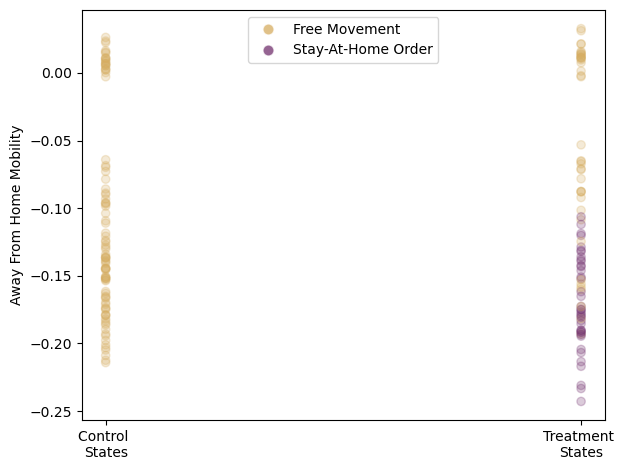

In [29]:
fig, ax = plt.subplots()

legend_elements = [Line2D([0], [0], marker = 'o', color = "w", 
                          label = "Free Movement", alpha = 0.75,
                          markerfacecolor = gold, markersize = 8),
                  Line2D([0], [0], marker = 'o', color = "w", 
                          label = "Stay-At-Home Order", alpha = 0.75,
                          markerfacecolor = purple, markersize = 8)]

c = [purple if i == 1 else gold for i in df.stayathome_advisory]
df.treatment_state = [1 if df.index[i][1] in treatmentFips else 0 for i in range(len(df))]

ax.scatter(df.treatment_state, df.gps_away_from_home, alpha = 0.25, c = c)
ax.set_ylabel('Away From Home Mobility')
ax.set_xticks([0,1])
ax.set_xticklabels(["Control \nStates", "Treatment \nStates"])
ax.legend(handles = legend_elements, loc = "upper center")
plt.tight_layout()
# plt.savefig("Control_vs_treatment_mobility.png")
plt.show()

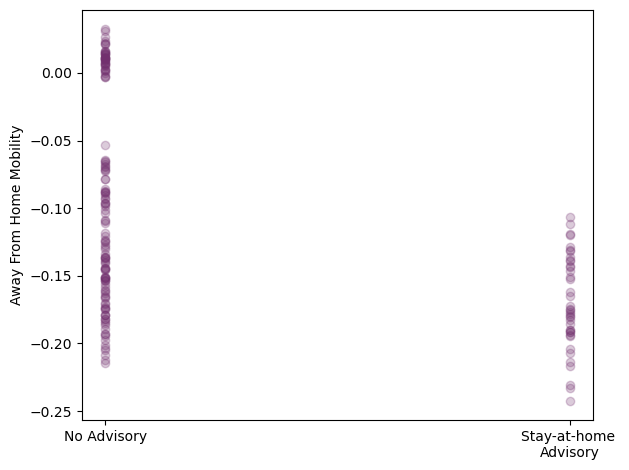

In [12]:
fig, ax = plt.subplots()

c = [purple if i == 1 else gold for i in df.stayathome_advisory]
df.treatment_state = [1 if df.index[i][1] in treatmentFips else 0 for i in range(len(df))]

ax.scatter(df.stayathome_advisory, df.gps_away_from_home, alpha = 0.25, c = purple)
ax.set_ylabel('Away From Home Mobility')
ax.set_xticks([0,1])
ax.set_xticklabels(["No Advisory", "Stay-at-home \nAdvisory"])
plt.tight_layout()
# plt.savefig("Stay_at_home_and_mobility.png")
plt.show()

In [13]:
# Define variables
xCols = ['gps_away_from_home']
X = sm.tools.tools.add_constant(df[xCols])
yVar = ['new_case_rate']

# Model
mod = PanelOLS(df[yVar], X, entity_effects = True)
re_res = mod.fit(cov_type = 'clustered', cluster_entity = True)
print(re_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:          new_case_rate   R-squared:                        0.1503
Estimator:                   PanelOLS   R-squared (Between):             -2.2137
No. Observations:                 149   R-squared (Within):               0.1503
Date:                Thu, Feb 10 2022   R-squared (Overall):             -0.3953
Time:                        19:37:58   Log-likelihood                   -408.21
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      23.871
Entities:                          13   P-value                           0.0000
Avg Obs:                       11.462   Distribution:                   F(1,135)
Min Obs:                       3.0000                                           
Max Obs:                       13.000   F-statistic (robust):             40.580
                            

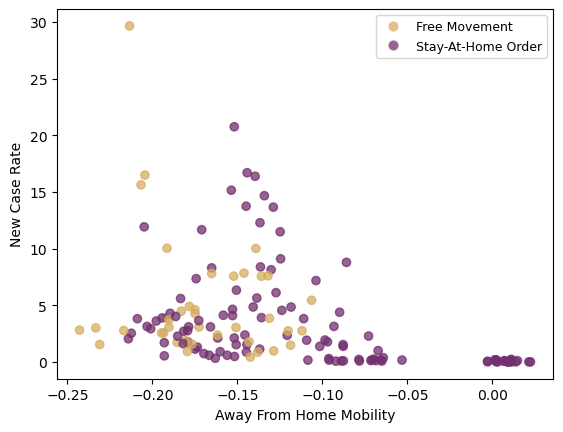

In [31]:
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker = 'o', color = "w", 
                          label = "Free Movement", alpha = 0.75,
                          markerfacecolor = gold, markersize = 8),
                  Line2D([0], [0], marker = 'o', color = "w", 
                          label = "Stay-At-Home Order", alpha = 0.75,
                          markerfacecolor = purple, markersize = 8)]


fig, ax = plt.subplots()

c = [gold if i == 1 else purple for i in df.stayathome_advisory]
ax.scatter(df.gps_away_from_home, df.new_case_rate, c = c, alpha = 0.75)
ax.set_xlabel('Away From Home Mobility')
ax.set_ylabel('New Case Rate')
ax.legend(handles = legend_elements, fontsize = 9)
plt.show()